<a href="https://colab.research.google.com/github/DevendraChoudhary15/Partical-Image-velocimetry/blob/main/piv_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Partical Image Velocimetry

It is used to obtain instantaneous velocity measurements and related properties in fluids. The fluid is seeded with tracer particles which, for sufficiently small particles, are assumed to faithfully follow the flow dynamics (the degree to which the particles faithfully follow the flow is represented by the Stokes number). The fluid with entrained particles is illuminated so that particles are visible. The motion of the seeding particles is used to calculate speed and direction (the velocity field) of the flow being studied.

In [ ]:
!/opt/bin/nvidia-smi
!wget https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
!dpkg -i cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb 2> /dev/null
!apt-key add /var/cuda-repo-8-0-local-ga2/7fa2af80.pub
!apt-get update
!apt-get install -qq cuda gcc-5 g++-5 -y
!ln -s /usr/bin/gcc-5 /usr/local/cuda/bin/gcc
!ln -s /usr/bin/g++-5 /usr/local/cuda/bin/g++
!/usr/local/cuda/bin/nvcc --version

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# put nvcc on PATH for PyCUDA install
import os
work_dir = os.getcwd()
if "/usr/local/cuda/bin" not in os.environ['PATH'].split(':'):
  os.environ['PATH'] += ":/usr/local/cuda/bin"
  
! echo $PATH
! nvcc --version

! pwd
! ls

In [ ]:
# install pycuda using pip
! pip install pycuda

In [ ]:
# check to make sure PyCUDA installed properly
# import pycuda.autoinit

In [ ]:
!pip install cython

In [ ]:
!# install scikits-cuda from github as the pip version cant find cusolver
!git clone https://github.com/lebedov/scikit-cuda.git


In [ ]:
#!ls
os.chdir(work_dir)
os.chdir('scikit-cuda')
%run setup.py install
# %run setup.py test

# add scikit-cuda to the PYTHONPATH
import sys
sys.path.append(os.getcwd())
os.chdir(work_dir)

In [ ]:
! pip install progressbar

Here we clone open-piv repositery with our cureent directry using following code

In [ ]:
!git clone http://github.com/alexlib/openpiv-python.git
os.chdir('openpiv-python')
sys.path.append(os.getcwd())
!python setup.py build
!python setup.py install

# New Section

In [ ]:
import openpiv

In [ ]:
from openpiv import tools, validation, filters, scaling, pyprocess
# import openpiv.process
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display

process begin



Here we have two images which we have taken during experiment of flow around cylinder, images show the positions of the particles at two different times. We are reading the images using tools.imread and also printing the images to confirm that they are read properly.

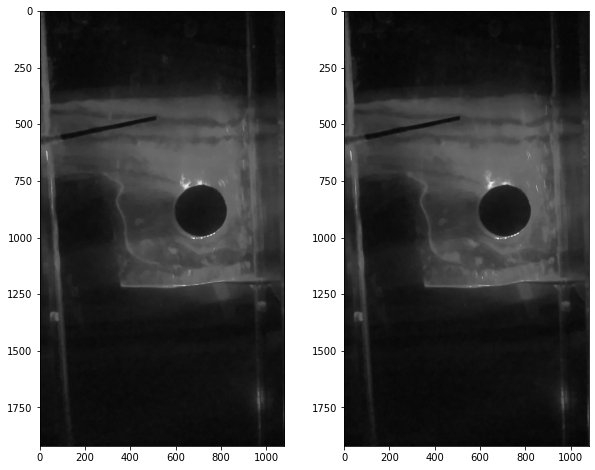

In [ ]:
# frame_a  = tools.imread( 'exp1_001_a.bmp' )
# frame_b  = tools.imread( 'exp1_001_b.bmp' )
# frame_a  = tools.imread( 'image_adjusted_A.bmp' )
# frame_b  = tools.imread( 'image_adjusted_A.bmp' )
frame_a  = tools.imread( 'image11.bmp' )
frame_b  = tools.imread( 'image12.bmp' )
fig,ax = plt.subplots(1,2,figsize=(10,8))
ax[0].imshow(frame_a,cmap=plt.cm.gray)
ax[1].imshow(frame_b,cmap=plt.cm.gray)

We can analyze small regions of interest, called interrogation windows. We can find out the distance that all the particles moved between frame 1 and frame 2 using the principles of least squares or cross-correlations(because we have two different images) and then find velocities of particles. 

In [ ]:
winsize = 128 # pixels
searchsize = 128  # pixels, search in image B
overlap = 12 # pixels
dt = 0.015 # sec
u, v, sig2noise = pyprocess.extended_search_area_piv( frame_a.astype(np.int32), frame_b.astype(np.int32), 
                                                     window_size=winsize, overlap=overlap, dt=dt, 
                                                     search_area_size=searchsize, sig2noise_method='peak2peak' )
x, y = pyprocess.get_coordinates( image_size=frame_a.shape, search_area_size=searchsize, overlap=overlap )
tools.save(x, y, u, v, np.zeros_like(u), 'output.txt' ) # no masking, all values are valid

Now we are plotting the velocity vectors in the first frame.

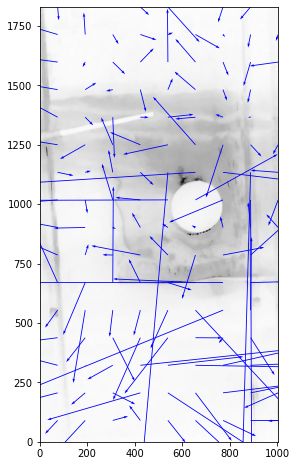

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
tools.display_vector_field('output.txt', 
                           ax=ax, scaling_factor=366.62, 
                           scale=50, # scale defines here the arrow length
                           width=0.0035, # width is the thickness of the arrow
                           on_img=True, # overlay on the image
                           image_name='image12.bmp');

In [ ]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('piv_project.ipynb')